<a href="https://colab.research.google.com/github/atroitskaia/IndustryProject/blob/main/EtsyIndustryProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from datetime import datetime

import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm

import seaborn as sns


from google.colab import data_table

In [67]:
data = pd.read_csv('/content/drive/MyDrive/BrainStation/Industry Project/_analytics20240919-12-vzzch6.csv')


In [22]:
data_keywords=pd.read_csv('/content/drive/MyDrive/BrainStation/Industry Project/keywords20240919-11-uk49dg.csv')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 1000 non-null   object 
 1   product_link                 1000 non-null   object 
 2   shop_name                    1000 non-null   object 
 3   shop_link                    1000 non-null   object 
 4   price                        1000 non-null   int64  
 5   est_mo_sales                 1000 non-null   int64  
 6   est_mo_revenue               1000 non-null   int64  
 7   est_total_sales              1000 non-null   int64  
 8   reviews                      1000 non-null   int64  
 9   listing_age                  1000 non-null   object 
 10  favorites                    1000 non-null   int64  
 11  avg_reviews                  1000 non-null   int64  
 12  views                        1000 non-null   int64  
 13  category           

In [49]:
data.shape

(1000, 33)

In [50]:
data


,product_name,product_link,shop_name,shop_link,price,est_mo_sales,est_mo_revenue,est_total_sales,reviews,listing_age,...,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13
0,"Wooden Washer and Dryer Top, Laundry Organizat...",https://www.etsy.com/listing/1471195988/wooden...,ByChelseaNicole,https://www.etsy.com/shop/ByChelseaNicole,400,678,271200,10914,451,16 Mo.,...,laundry table top,laundry room table,laundry room tray,laundry room cover,appliance cover,washer cover,laundry organization,wood table top,washer and dryer,Gift
1,The Complete Nursing School Bundle® | 2025 Edi...,https://www.etsy.com/listing/798029662/the-com...,NurseInTheMaking,https://www.etsy.com/shop/NurseInTheMaking,128,1385,177280,72240,9703,52 Mo.,...,Nursing study guide,headtotoe assessment,Nursing medsurg,Nursingschool bundle,Nursing cheat sheet,Fundamentals nursing,RNExplained,Nurseinthemaking,Nurseinthemake,rnexplaine
2,"Personalized Name Necklace, Name Logo Necklace...",https://www.etsy.com/listing/1097017861/person...,RobertoGoldDiamond,https://www.etsy.com/shop/RobertoGoldDiamond,120,1251,150120,43822,10512,35 Mo.,...,necklace with name,necklace for women,gift for mom,gifts for her,gifts for wife,personalized jewelry,minimalist,jewelry gift,Mothers day gift,handmade jewelry
3,"Marble Wood Charcuterie Board, Wedding Gift, G...",https://www.etsy.com/listing/1283162551/marble...,EngraveMyMemories,https://www.etsy.com/shop/EngraveMyMemories,125,716,148217,8075,1539,25 Mo.,...,marble wood board,charcuterie board,gift for couple,wedding gift,anniversary gift,housewarming gift,engagement gift,bridal shower gift,bride and groom gift,serving tray
4,Madam President - Kamala Harris (and Tim!) 202...,https://www.etsy.com/listing/1774368557/madam-...,colinharman,https://www.etsy.com/shop/colinharman,28,4187,117236,4187,415,1 Mo.,...,Madam president,President harris,Yard sign,kamala harris sign,vote outdoor signs,election yard signs,Tim walz,Harris walz 2024,Harris 2024 yard,Kamala yard sign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Personalized Neon Sign I Neon Light I Individu...,https://www.etsy.com/listing/1770471088/person...,TATONEONDESIGN,https://www.etsy.com/shop/TATONEONDESIGN,33,422,13989,422,1,1 Mo.,...,LED neon light,NeonLight,Birthday decoration,neon sign name,Neon sign german,neon light font,neon sign custom,neon sign wall,neon sign battery,--
996,Wedding Planner Spreadsheet Wedding Budget Tra...,https://www.etsy.com/listing/1702251197/weddin...,PrioriDigitalStudio,https://www.etsy.com/shop/PrioriDigitalStudio,22,636,13982,3602,251,6 Mo.,...,Wedding timeline,wedding checklist,seating chart,wedding itinerary,wedding schedule,wedding guest list,wedding to do list,honeymoon budget,pre wedding gift,digital planner
997,"Pet Memorial Night Light, Custom Pet Plaque, P...",https://www.etsy.com/listing/1654517161/pet-me...,Whakamarama,https://www.etsy.com/shop/Whakamarama,64,218,13978,1743,408,8 Mo.,...,Dog Night Light,Cat Night Light,Gifts for Pets,Personalized Gifts,Forever Loved Gift,Night Light,Memorial Night Light,Pet Gift,Pet Memorial,Custom Pet Print
998,Moroccan rug blue - Berber rug - Custom Morocc...,https://www.etsy.com/listing/1539401178/morocc...,marocberberart,https://www.etsy.com/shop/marocberberart,493,9,13978,73,19,13 Mo.,...,Handmade rug,Blue rug,blue carpet,shaggy blue rug,indigo rug,custom blue rug,blue area rug,custom rug,moroccan area rug,Minimalist rug


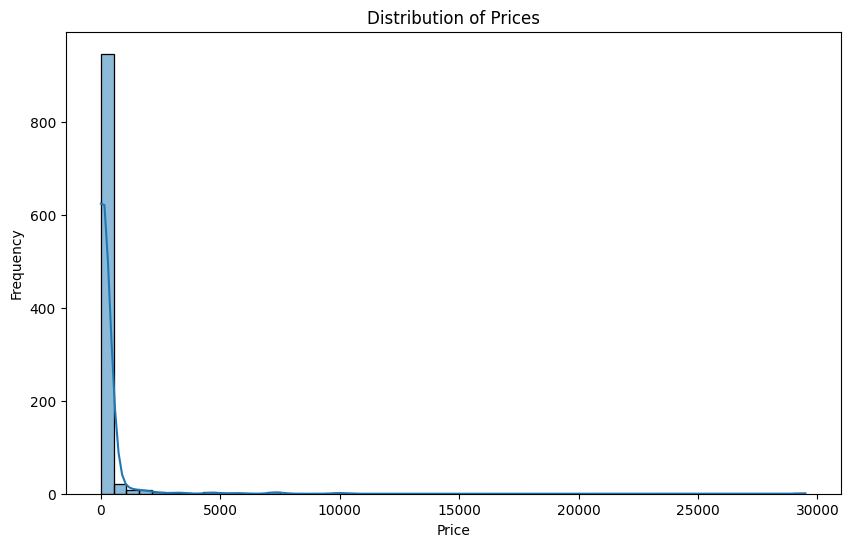

In [61]:
# Distribution of prices

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=55, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

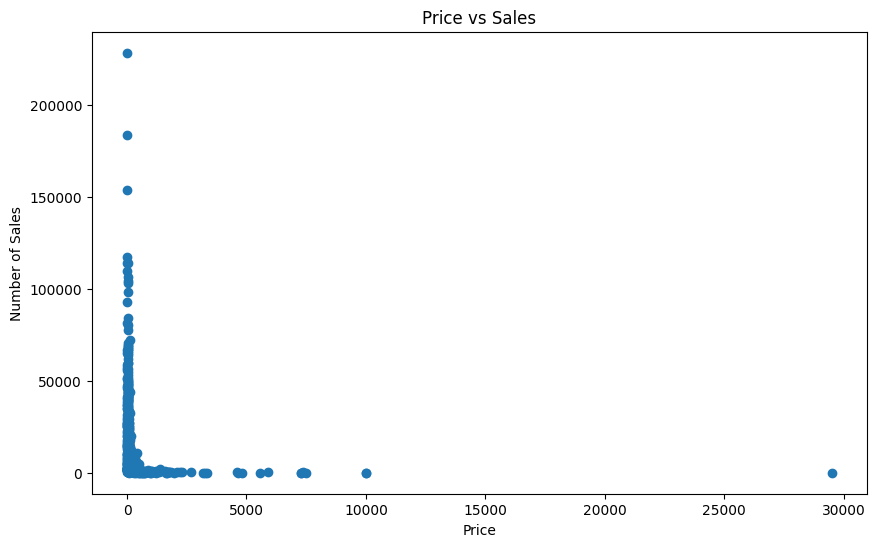

In [39]:
# Relationship between price and number of sales
plt.figure(figsize=(10, 6))
plt.scatter(data['price'], data['est_total_sales'])
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Number of Sales')
plt.show()

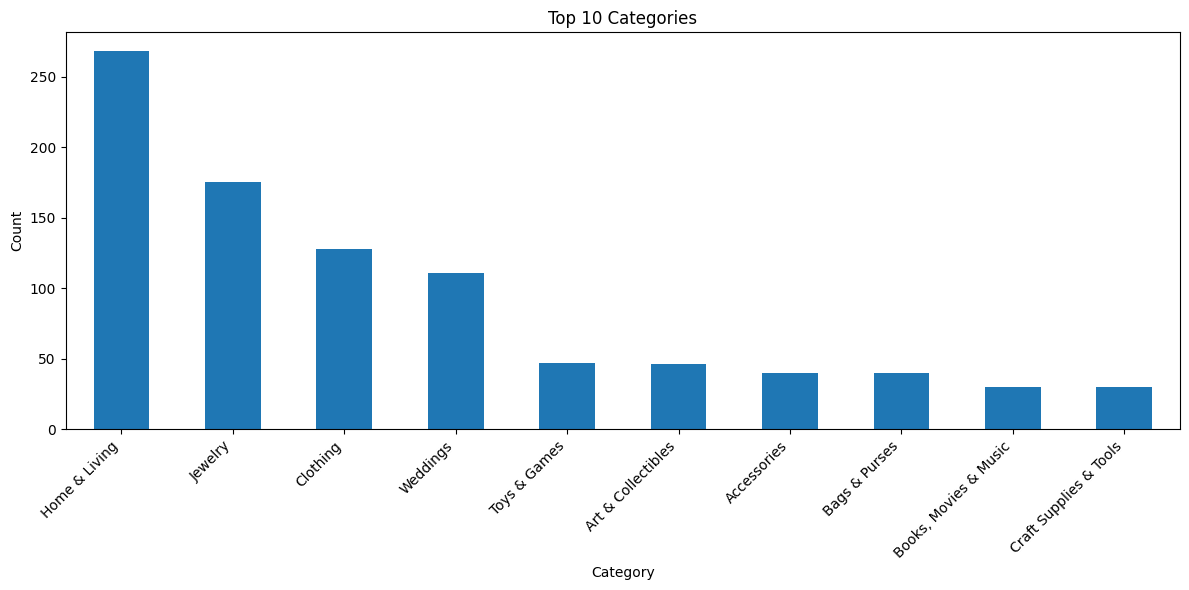

In [41]:
# Top 10 categories
top_categories = data['category'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
data.drop(columns='description_character_count', axis=1, inplace=True)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      1000 non-null   object 
 1   product_link      1000 non-null   object 
 2   shop_name         1000 non-null   object 
 3   shop_link         1000 non-null   object 
 4   price             1000 non-null   int64  
 5   est_mo_sales      1000 non-null   int64  
 6   est_mo_revenue    1000 non-null   int64  
 7   est_total_sales   1000 non-null   int64  
 8   reviews           1000 non-null   int64  
 9   listing_age       1000 non-null   object 
 10  favorites         1000 non-null   int64  
 11  avg_reviews       1000 non-null   int64  
 12  views             1000 non-null   int64  
 13  category          977 non-null    object 
 14  shop_age          1000 non-null   int64  
 15  visibility_score  1000 non-null   int64  
 16  conversion_rate   1000 non-null   float64
 

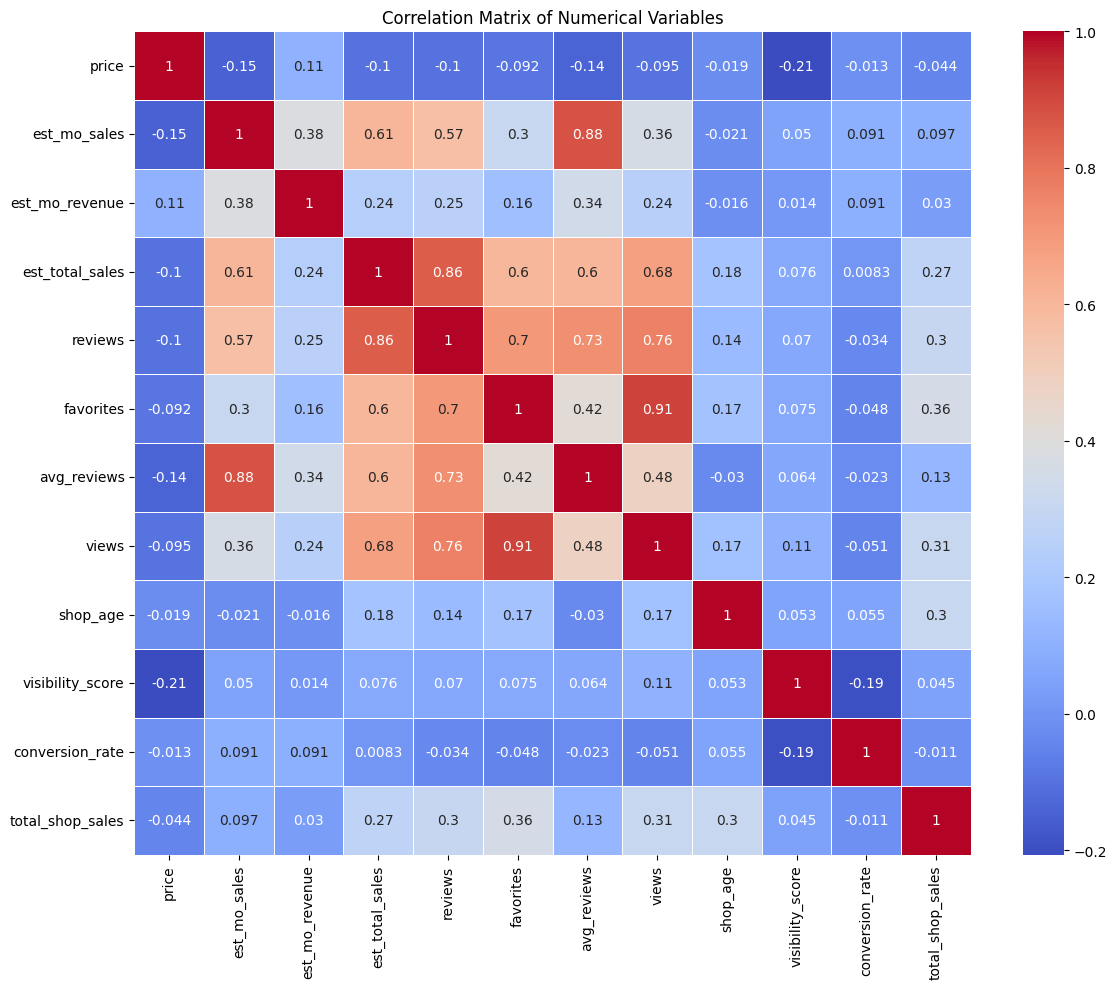

In [64]:
# Correlation between numerical variables
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

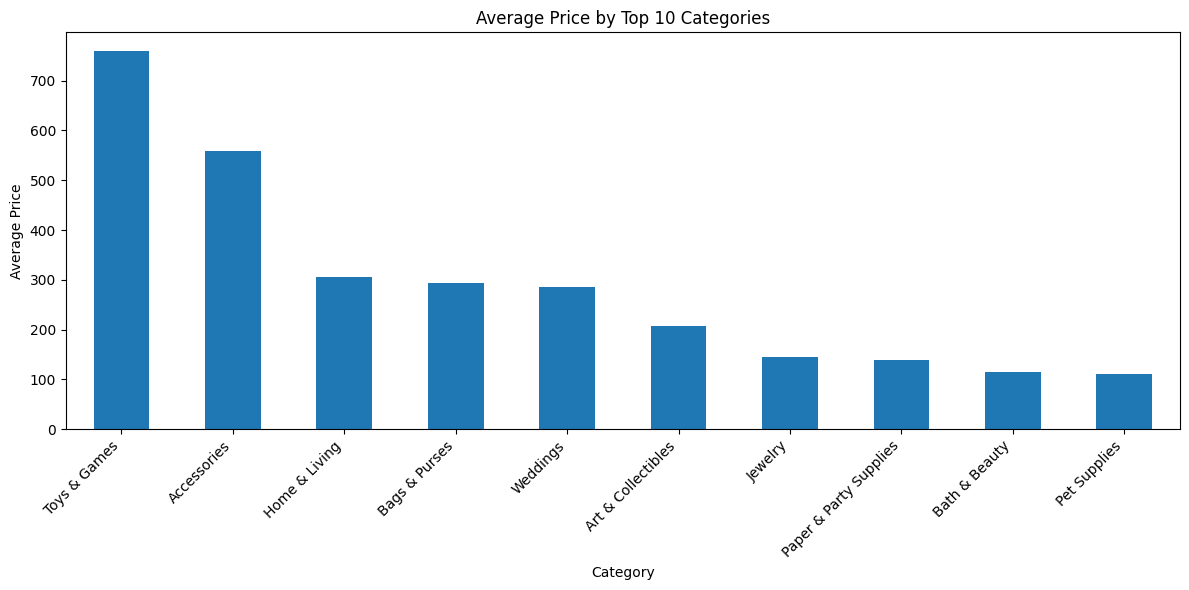

In [65]:
# Average price by category
avg_price_by_category = data.groupby('category')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_price_by_category.plot(kind='bar')
plt.title('Average Price by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [69]:
data_keywords.shape

(220, 4)

In [70]:
data_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Keyword        220 non-null    object 
 1   Volume         220 non-null    int64  
 2   Competition    220 non-null    float64
 3   Keyword Score  220 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.0+ KB


In [71]:
data_keywords.head()

,Keyword,Volume,Competition,Keyword Score
0,18k gold name necklace,1158,8132.0,140000.0
1,3d world map,641,5151.0,120000.0
2,above crib sign,1455,5829.0,250000.0
3,anniversary gift,11888,3208518.0,0.0
4,anniversary gifts,12110,3206014.0,0.0
